['news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_culture', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_entertainment', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports', 'news_sports',

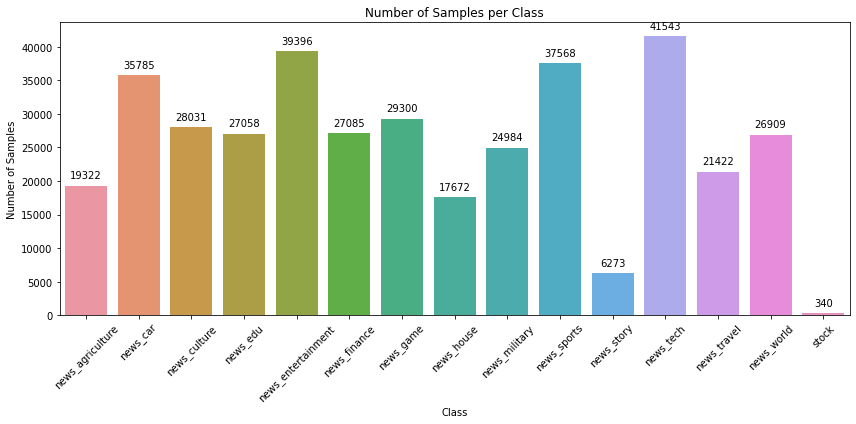

In [4]:
# -*- coding: UTF-8 -*-
import os
import random
import jieba
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据加载与预处理
path = "./toutiao_cat_data.txt"
data_list = []  # 数据集数据
class_list = []  # 数据集类别

with open(path, 'r', encoding='utf-8') as f:  # 打开txt文件
    for line in f.readlines():
        line = line.strip().split("_!_")  # 去除"_!_"
        if len(line) >= 5:
            strr = line[3] + line[4]  # 有标题和关键词
        else:
            strr = line[3]  # 只有标题
        word_cut = jieba.cut(strr, cut_all=False)  # 精简模式，返回一个可迭代的generator
        word_list = list(word_cut)  # generator转换为list
        data_list.append(word_list)
        class_list.append(line[2])

# 打印前100个类别标签
print(class_list[:100])

# 计算每个类别的数量
class_counts = pd.Series(class_list).value_counts().sort_index()

# 可视化类别分布
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Samples per Class')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# 在条形图上显示具体数值
for p, value in zip(ax.patches, class_counts.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()
